In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel(r'C:\Users\ACER\Downloads\Copy of customer_transactions_sample (1).xlsx')

In [52]:
rdf

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [53]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [54]:
df.rename(columns={'Customer ID':'Customer_ID'},inplace=True)

In [55]:
df.dropna(inplace=True)

In [56]:
df1=df

In [62]:
df=df1

In [42]:
r=df.groupby('Quantity')

In [44]:
r.first()

,Invoice,StockCode,Description,InvoiceDate,Price,Customer_ID,Country
Quantity,,,,,,,
-9360,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
-7128,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,2010-09-28 11:02:00,0.08,14277.0,France
-7008,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,2010-09-28 11:02:00,0.13,14277.0,France
-5184,C524235,16047,POP ART PEN CASE & PENS,2010-09-28 11:02:00,0.08,14277.0,France
-4992,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,2010-09-28 11:02:00,0.10,14277.0,France
...,...,...,...,...,...,...,...
10000,502269,21984,PACK OF 12 PINK PAISLEY TISSUES,2010-03-23 15:36:00,0.25,17940.0,United Kingdom
12480,501534,21092,SET/6 STRAWBERRY PAPER PLATES,2010-03-17 13:09:00,0.10,13902.0,Denmark
12744,501534,21085,SET/6 WOODLAND PAPER CUPS,2010-03-17 13:09:00,0.10,13902.0,Denmark


In [71]:
#removing cancellation of orders
negativefilt=df['Quantity']>0
df=df.loc[negativefilt,'Invoice':'Country']

In [74]:
df.tail

<bound method NDFrame.tail of        Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer_ID         Country  
0   

In [75]:
#recency
last_date="2010-12-09 20:01:00"
last_date=pd.to_datetime(last_date)
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
recency=df.groupby(['Customer_ID']).agg({'InvoiceDate': lambda x:((last_date-x.max()).days)})
print(recency)
# no.of unique customers=4314

             InvoiceDate
Customer_ID             
12346.0              164
12347.0                2
12348.0               73
12349.0               42
12351.0               10
...                  ...
18283.0               17
18284.0               66
18285.0              295
18286.0              111
18287.0               17

[4314 rows x 1 columns]


In [ ]:
recency.rename(columns=['InvoiceDate'])

In [77]:
#frequency
frequency=df.drop_duplicates(subset='Invoice').groupby(['Customer_ID'])[['Invoice']].count()
print(frequency)





             Invoice
Customer_ID         
12346.0           11
12347.0            2
12348.0            1
12349.0            3
12351.0            1
...              ...
18283.0            6
18284.0            1
18285.0            1
18286.0            2
18287.0            4

[4314 rows x 1 columns]


In [81]:
#monetary
df['total']=df['Quantity']*df['Price']
monetary=df.groupby(['Customer_ID'])[['total']].sum()
print(monetary)

               total
Customer_ID         
12346.0       372.86
12347.0      1323.32
12348.0       222.16
12349.0      2671.14
12351.0       300.93
...              ...
18283.0       641.77
18284.0       461.68
18285.0       427.00
18286.0      1296.43
18287.0      2345.71

[4314 rows x 1 columns]


In [83]:
RFM=pd.concat([recency,frequency,monetary],axis=1)

In [85]:
RFM.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','total':'Monetary'},inplace=True)

In [89]:
#normalizing the RFM model
from sklearn.preprocessing import StandardScaler
scaledRFM=StandardScaler().fit_transform(RFM)

array([[ 0.76064344,  0.80143595, -0.18789547],
       [-0.91062704, -0.30046398, -0.08123991],
       [-0.17815665, -0.42289731, -0.20480622],
       ...,
       [ 2.1121029 , -0.42289731, -0.18182017],
       [ 0.21386976, -0.30046398, -0.08425736],
       [-0.75587978, -0.05559733,  0.03348725]])

KMeans(n_clusters=2, n_init=10, random_state=4)
[0 0 0 ... 0 0 0]


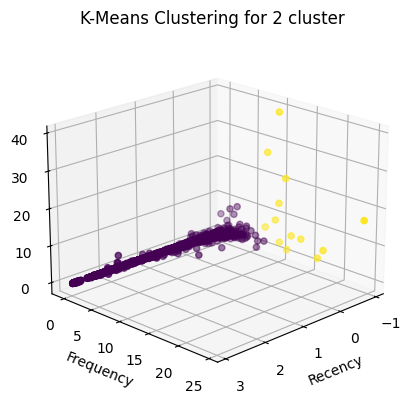

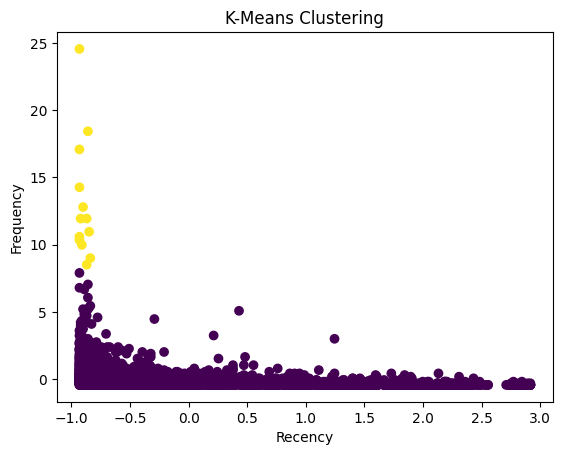

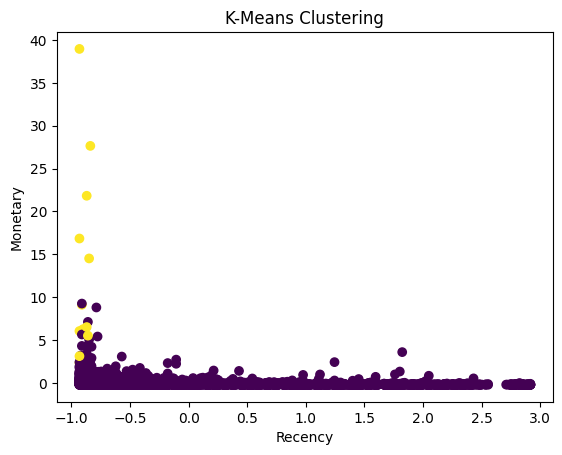

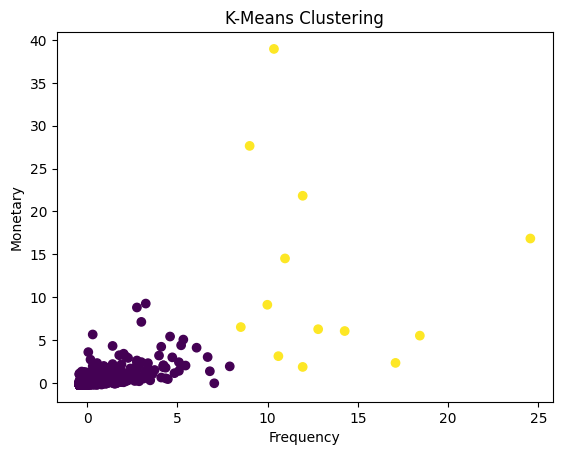

KMeans(n_clusters=3, n_init=10, random_state=4)
[2 0 0 ... 2 0 0]


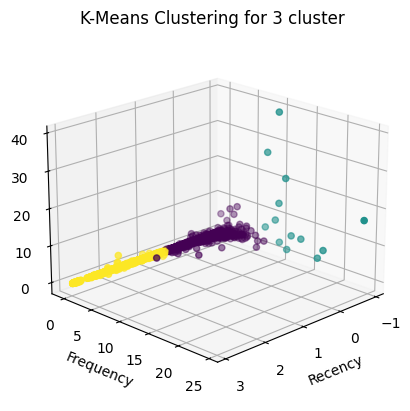

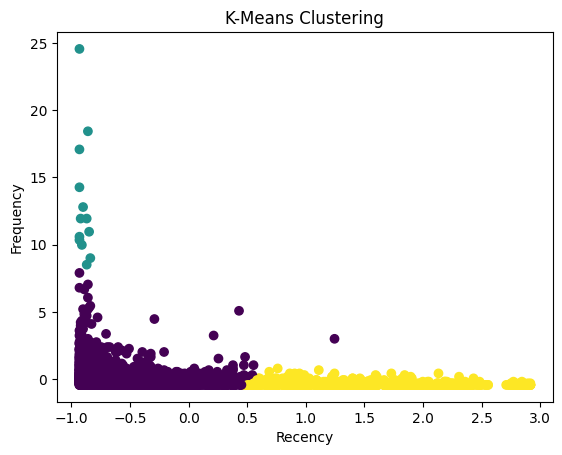

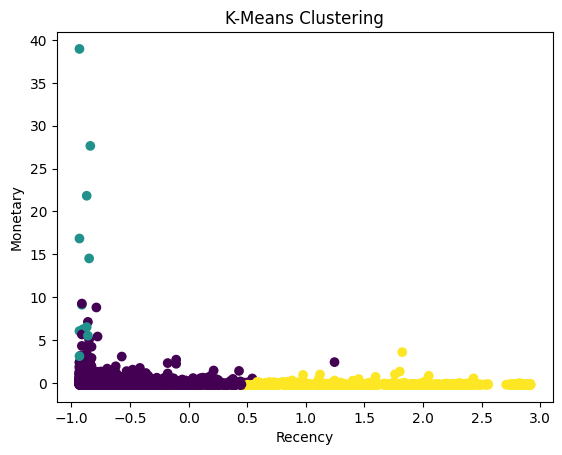

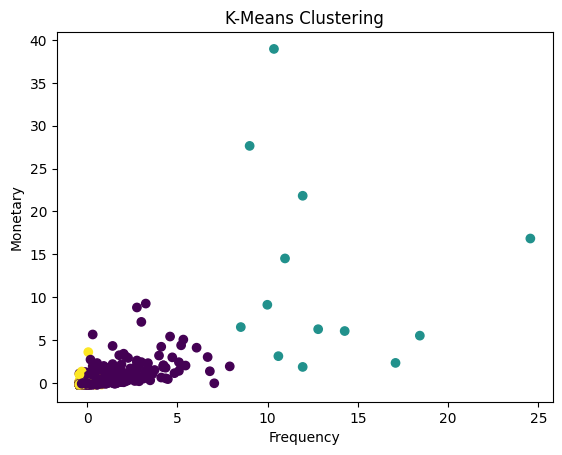

KMeans(n_clusters=4, n_init=10, random_state=4)
[2 0 0 ... 2 0 0]


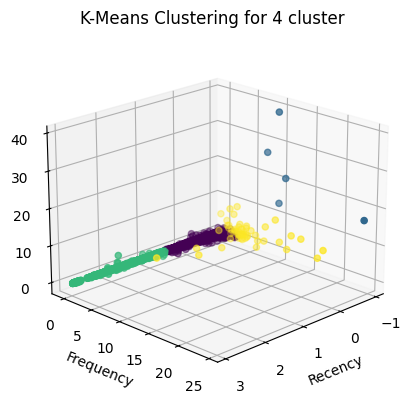

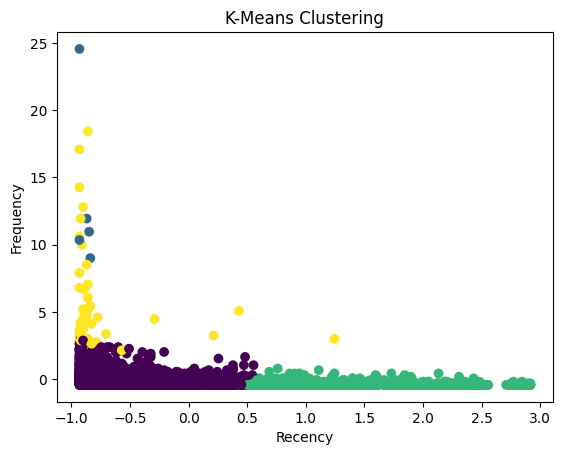

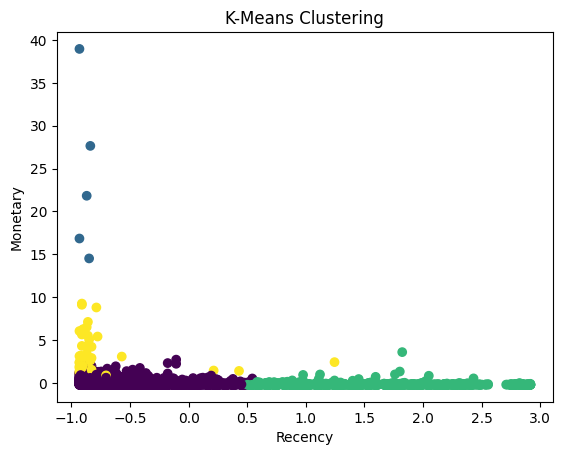

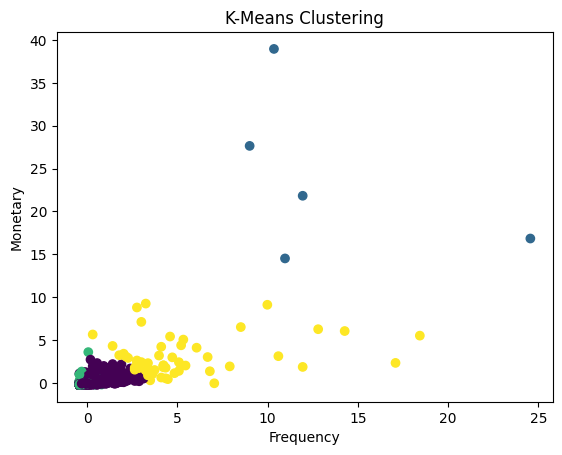

KMeans(n_clusters=5, n_init=10, random_state=4)
[2 0 0 ... 2 0 0]


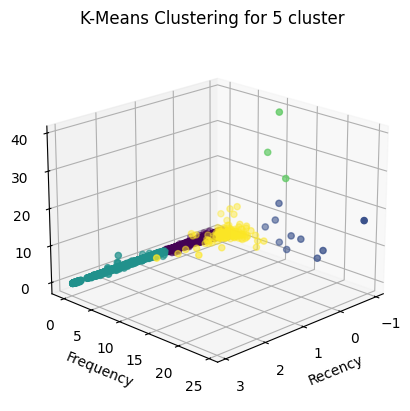

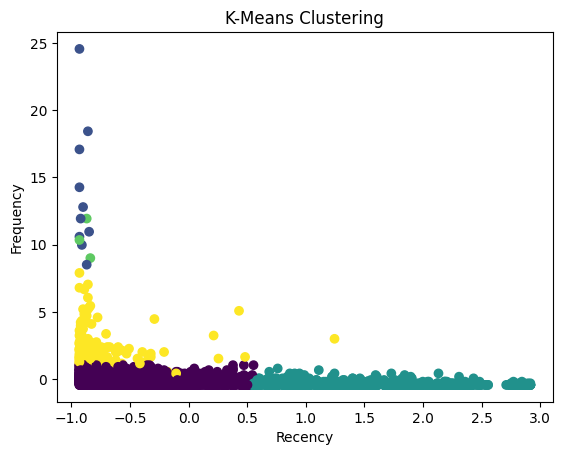

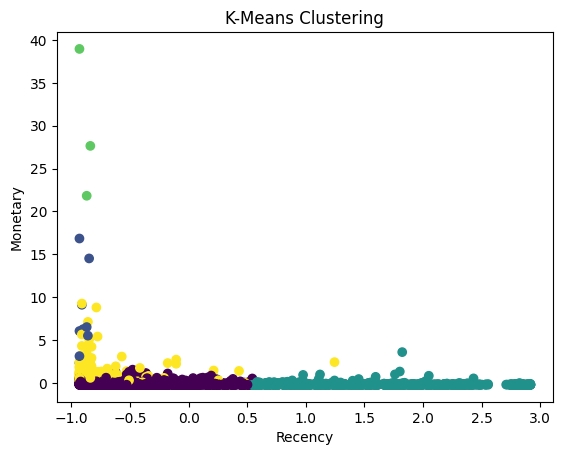

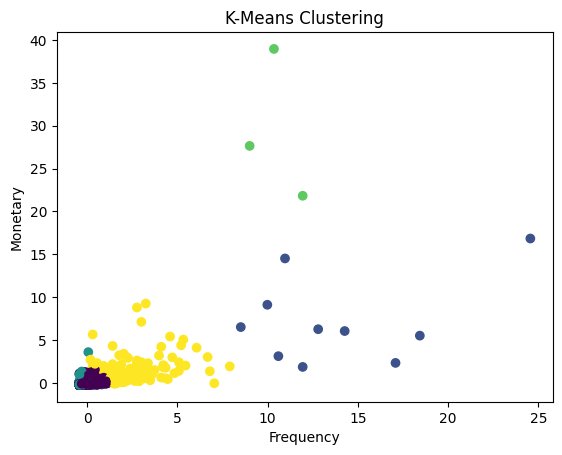

KMeans(n_clusters=6, n_init=10, random_state=4)
[1 0 0 ... 1 0 0]


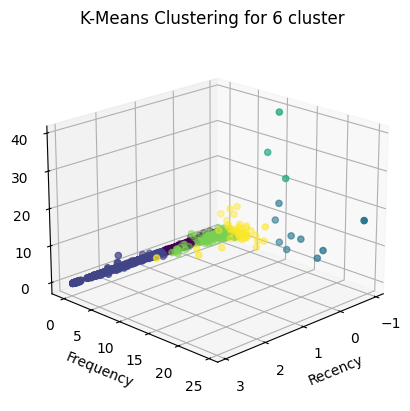

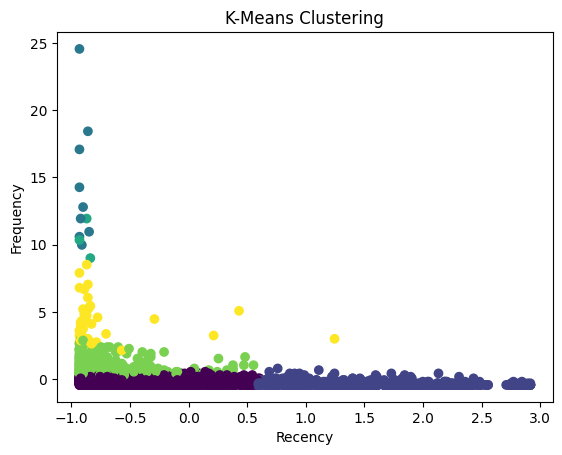

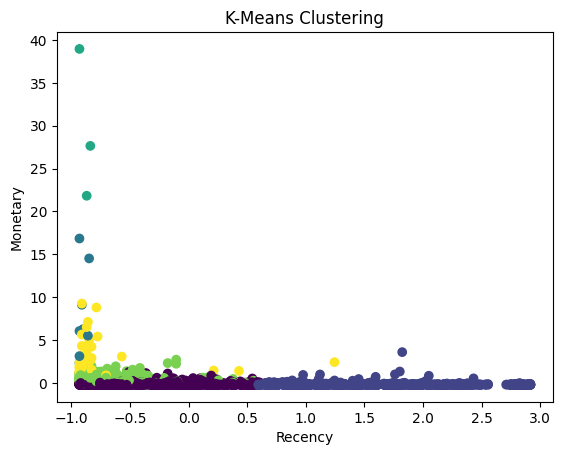

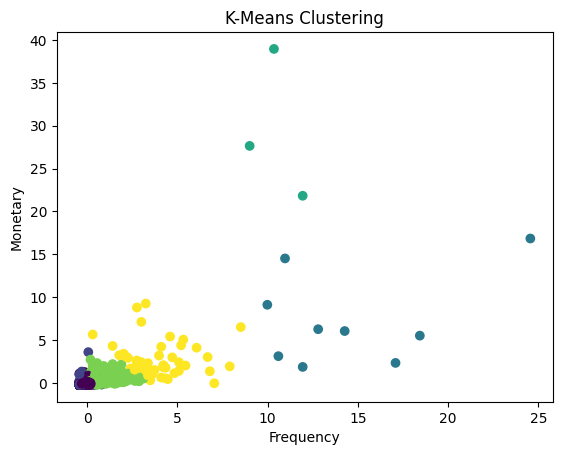

KMeans(n_clusters=7, n_init=10, random_state=4)
[1 4 4 ... 5 1 4]


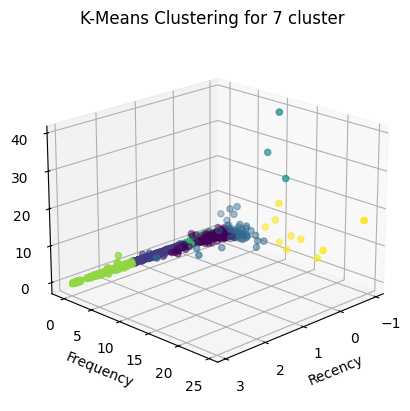

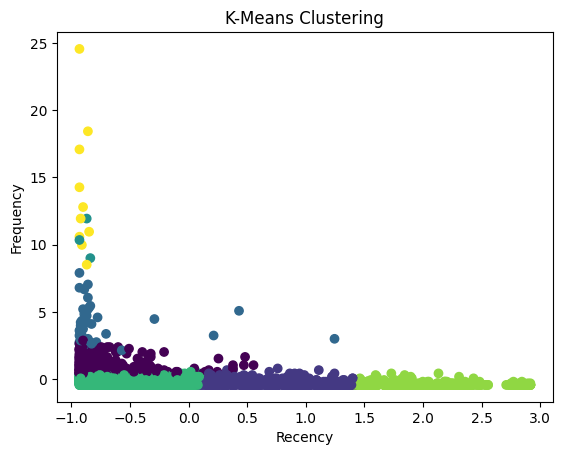

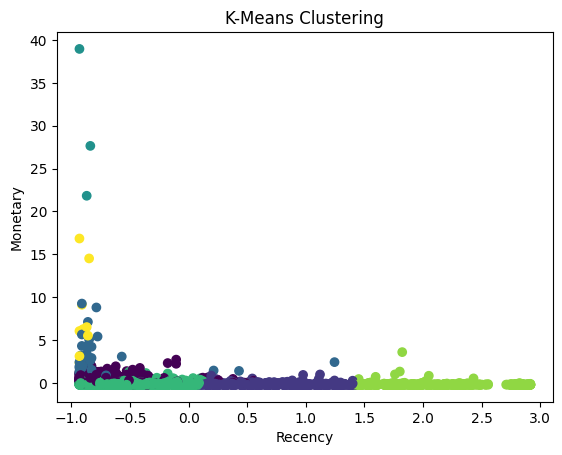

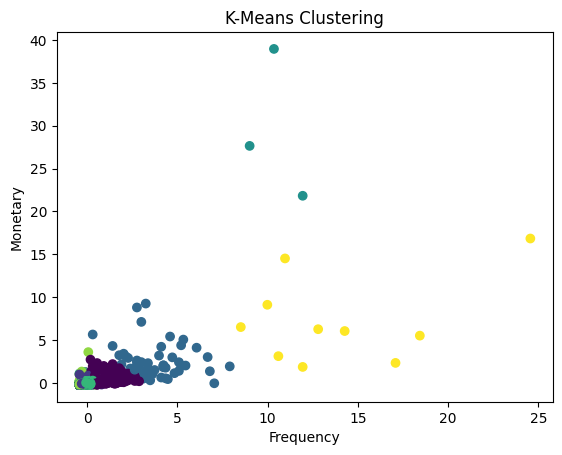

KMeans(n_init=10, random_state=4)
[0 5 5 ... 3 0 5]


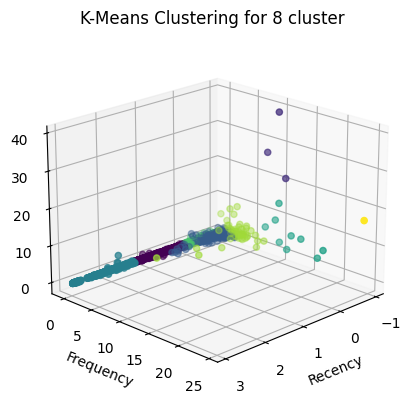

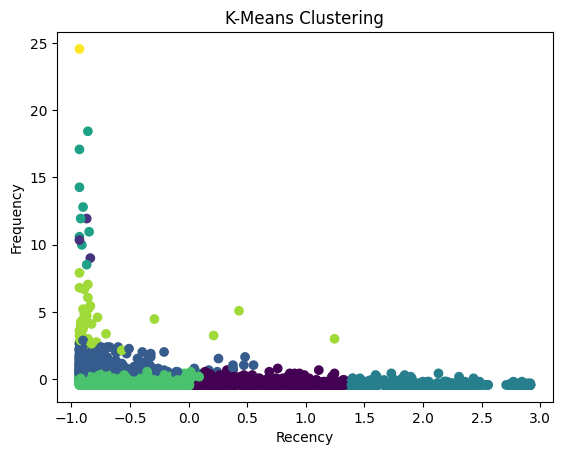

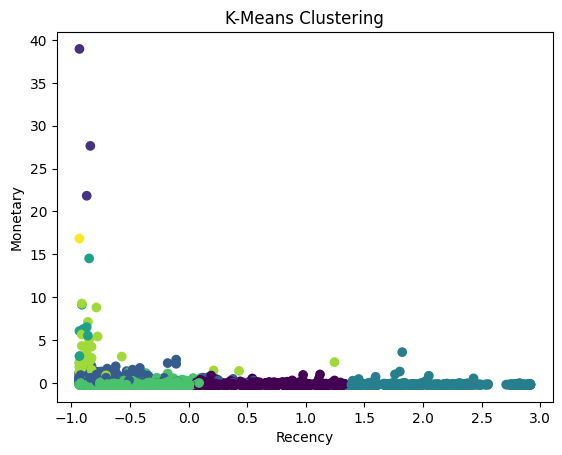

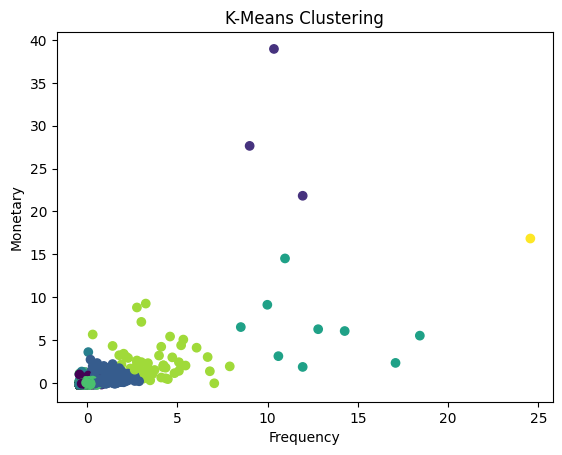

KMeans(n_clusters=9, n_init=10, random_state=4)
[2 6 0 ... 5 0 6]


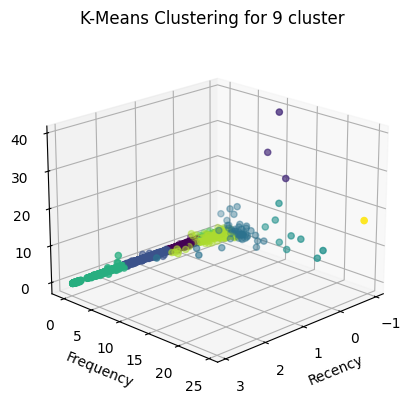

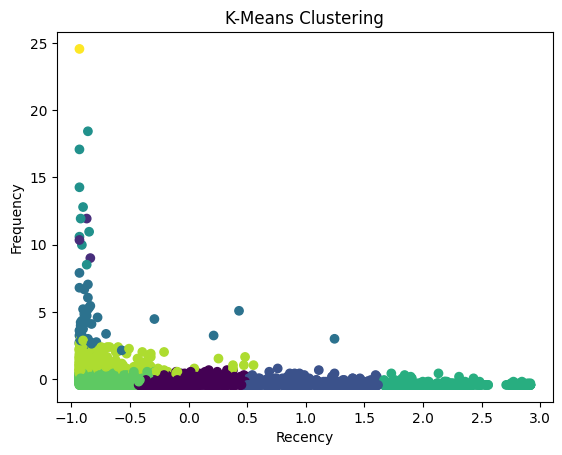

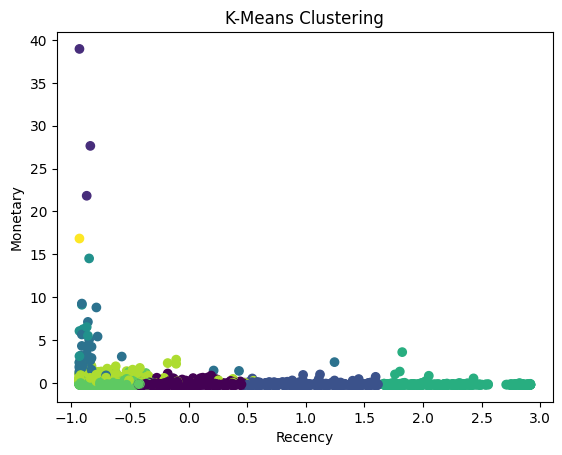

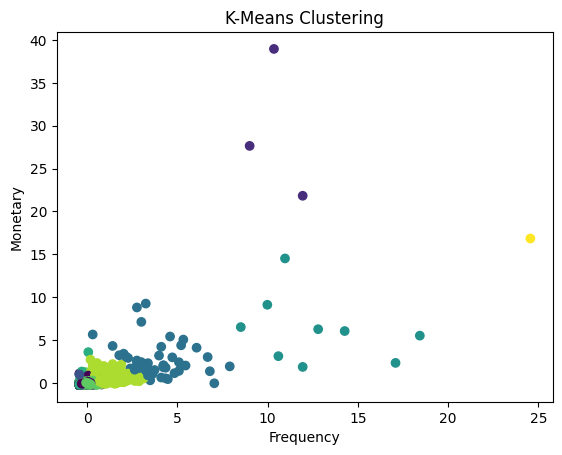

KMeans(n_clusters=10, n_init=10, random_state=4)
[4 7 7 ... 8 4 7]


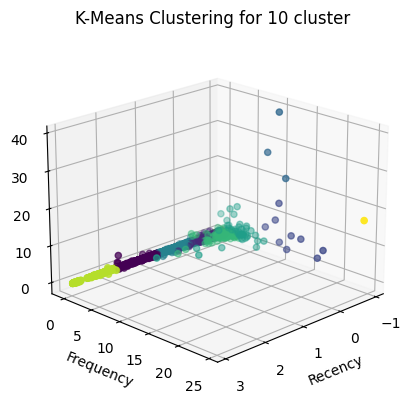

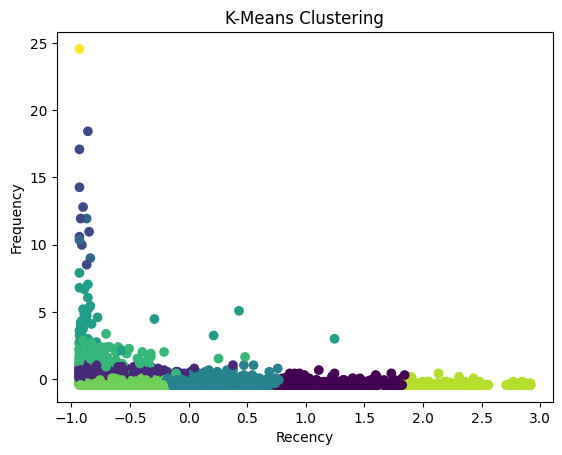

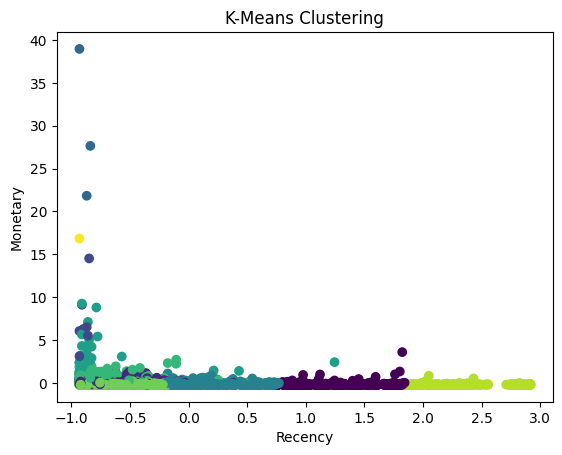

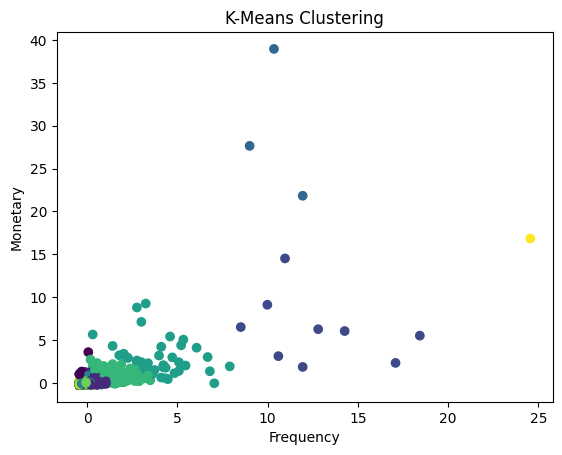

In [143]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,pairwise_distances
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
colors = np.random.choice(['red', 'green', 'blue', 'yellow', 'purple'], size=100)
hopkin=[]
silho=[]
numbercluster=[]
db=[]
ch=[]
dunn=[]
modeltype=[]
inerti=[]
def dunn_index(X, labels):
    cluster_centers = [np.mean(X[labels == i], axis=0) for i in np.unique(labels)]
    max_diameter = max([np.max(pairwise_distances(X[labels == i])) for i in np.unique(labels)])
    min_distance = min([np.min(pairwise_distances(cluster_centers[j].reshape(1, -1), cluster_centers[k].reshape(1, -1))) for j in range(len(cluster_centers)) for k in range(j+1, len(cluster_centers))])
    return min_distance / max_diameter
def hopkins_statistic(X, n):
    d = X.shape[1]
    neigh = NearestNeighbors(n_neighbors=1)
    rand_X = np.random.rand(n, d)
    neigh.fit(X)
    ujd = []
    wjd = []
    for j in range(0, n):
        u_dist, _ = neigh.kneighbors(rand_X[j].reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = neigh.kneighbors(X[j].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    return H
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=4,n_init=10)
    labels=kmeans.fit_predict(scaledRFM)
    print(kmeans)
    print(labels)
    
    #closer to 1 better it is
    silhoulette_avg=silhouette_score(scaledRFM,labels)
    silho.append(silhoulette_avg)
    
    db_index=davies_bouldin_score(scaledRFM, labels)
    db.append(db_index)
    
    ch_index=calinski_harabasz_score(scaledRFM, labels)
    ch.append(ch_index)
    
    distances=pairwise_distances(scaledRFM)
    dunn.append(dunn_index(scaledRFM, labels))
    
    hopkin.append(hopkins_statistic(scaledRFM, len(scaledRFM)))
    numbercluster.append(i)
    modeltype.append('Kmeans')
    inerti.append(kmeans.inertia_)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(scaledRFM[:, 0], scaledRFM[:, 1], scaledRFM[:, 2], c=labels)
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    ax.view_init(elev=20, azim=45) 
    plt.title('K-Means Clustering for '+str(i)+' cluster')
    plt.show()
    
    
    plt.scatter(scaledRFM[:, 0], scaledRFM[:, 1], c=labels)
    plt.xlabel('Recency')
    plt.ylabel('Frequency')
    plt.title('K-Means Clustering')
    plt.show()
    
    plt.scatter(scaledRFM[:, 0], scaledRFM[:, 2], c=labels)
    plt.xlabel('Recency')
    plt.ylabel('Monetary')
    plt.title('K-Means Clustering')
    plt.show()
    
    plt.scatter(scaledRFM[:, 1], scaledRFM[:, 2], c=labels)
    plt.xlabel('Frequency')
    plt.ylabel('Monetary')
    plt.title('K-Means Clustering')
    plt.show()

In [127]:
modeldict={
    'Clusters':numbercluster,
    'Silhouette_score':silho,
    'Davies-Bouldin_Index':db,
    'Calinski-Harabasz_Index':ch,
    'Dunn_Index':dunn,
    'Hopkin_stat':hopkin,
    'Inertia':inerti,
    'Model_type':modeltype
}

In [128]:
modeldf=pd.DataFrame(modeldict)

In [129]:
modeldf
#higher silhoulette_score better model
#lower Davies-Bouldin_Index better model
#higher Calinski-Harabasz_Index better model
#higher Dunn_Index better model 
#higher Hopkin_stat better model
#lower inertia better model

,Clusters,Silhouette_score,Davies-Bouldin_Index,Calinski-Harabasz_Index,Dunn_Index,Hopkin_stat,Inertia,Model_type
0,2,0.926647,0.614393,2102.210807,0.485938,0.876193,8700.353898,Kmeans
1,3,0.589233,0.598248,3251.297430,0.056556,0.875425,5159.533958,Kmeans
2,4,0.610774,0.615233,3746.133960,0.079761,0.877623,3587.508249,Kmeans
3,5,0.614008,0.630147,4013.244142,0.105931,0.877238,2738.785099,Kmeans
4,6,0.511818,0.691181,4120.446334,0.059810,0.876658,2238.203121,Kmeans
5,7,0.497333,0.681035,4389.241767,0.060774,0.877082,1819.098481,Kmeans
6,8,0.493961,0.622923,4392.765278,0.069934,0.876754,1589.724337,Kmeans
7,9,0.406619,0.680855,4433.675017,0.036590,0.875336,1400.787102,Kmeans
8,10,0.419078,0.693479,4461.193112,0.040651,0.877396,1253.226979,Kmeans


In [138]:
pip install tensorflow-addons


   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
    --------------------------------------- 10.2/719.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/719.8 kB 163.8 kB/s eta 0:00:05
   -- ------------------------------------ 41.0/719.8 kB 164.3 kB/s eta 0:00:05
   --- ----------------------------------- 61.4/719.8 kB 218.8 kB/s eta 0:00:04
   --- ----------------------------------- 71.7/719.8 kB 218.6 kB/s eta 0:00:03
   ---- ---------------------------------- 92.2/719.8 kB 262.6 kB/s eta 0:00:03
   ------ ------------------------------- 122.9/719.8 kB 300.4 kB/s eta 0:00:02
   -------- ----------------------------- 153.6/719.8 kB 328.1 kB/s eta 0:00:02
   --------- ---------------------------- 184.3/719.8 kB 359.7 kB/s eta 0:00:02
 

In [139]:
#thus choosing 4 segments
#use a tensorflow 2.14.0 for using this code 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow_addons.layers import KMeansLayer

input_shape = (3,)
for i in range(3,10):
    num_cluster=i
    input_layer = Input(shape=(scaledRFM.shape[1],))
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    kmeans_layer = KMeansLayer(units=num_cluster)(hidden_layer2)
    output_layer = Dense(5, activation='softmax')(kmeans_layer)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    model.fit(scaledRFM, epochs=100, batch_size=32)
    cluster_assignments = model.predict(scaledRFM)
    
    silhouette_avg = silhouette_score(scaledRFM, np.argmax(cluster_assignments, axis=1))

    
    db_index=davies_bouldin_score(scaledRFM, np.argmax(cluster_assignments, axis=1))
    
    ch_index=calinski_harabasz_score(scaledRFM, np.argmax(cluster_assignments, axis=1))

    
    distances=pairwise_distances(scaledRFM)
    dunn=(dunn_index(scaledRFM, np.argmax(cluster_assignments, axis=1)))
    
    hopkin=(hopkins_statistic(scaledRFM, len(scaledRFM)))
    newrecord=pd.DataFrame([{'Cluster':i,'Silhouette_score':silhouette_avg,'Davies-Bouldin_Index':db_index,'Calinski-Harabasz_Index':ch_index,'Dunn_Index':dunn,'Hopkin_stat':hopkin,'Inertia':np.nan,'Model_type':'Kmeans Neural Network'}])
    df=pd.concat([df,new_record])
    

C:\Users\ACER\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning:



TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 


C:\Users\ACER\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning:

Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tes

ImportError: cannot import name 'KMeansLayer' from 'tensorflow_addons.layers' (C:\Users\ACER\anaconda3\lib\site-packages\tensorflow_addons\layers\__init__.py)

In [144]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [146]:
r=df.groupby(['StockCode'])

In [148]:
r.first()

,Invoice,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,total
StockCode,,,,,,,,
10002,489437,INFLATABLE POLITICAL GLOBE,12,2009-12-01 09:08:00,0.850,15362.0,United Kingdom,10.200
10080,489879,GROOVY CACTUS INFLATABLE,1,2009-12-02 16:02:00,0.850,17660.0,United Kingdom,0.850
10109,490017,BENDY COLOUR PENCILS,4,2009-12-03 12:31:00,0.420,14159.0,United Kingdom,1.680
10120,489640,DOGGY RUBBER,60,2009-12-01 16:17:00,0.210,17345.0,United Kingdom,12.600
10125,489654,MINI FUNKY DESIGN TAPES,4,2009-12-01 17:19:00,0.850,15750.0,United Kingdom,3.400
...,...,...,...,...,...,...,...,...
PADS,494914,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom,0.001
POST,489439,POSTAGE,3,2009-12-01 09:28:00,18.000,12682.0,France,54.000
SP1002,525772,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.950,12748.0,United Kingdom,2.950


<h1> Q2 </h1>


In [4]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.1/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:03
   ---------------------------------------- 0.1/99.8 MB 566.5 kB/s eta 0:02:56
   ---------------------------------------- 0.2/99.8 MB 615.9 kB/s eta 0:02:42
   ---------------------------------------- 0.2/99.8 MB 621.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.8 MB 625.8 kB/s eta 0:02:40
   ---------------------------------------- 0.3/99.8 MB 654.2 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.8 MB 655.5 kB/s eta 0:02:32
   ---------------------------------------- 0.3/99.8 MB 655.4 kB/s eta 0:02:32
   ---------------------------------------- 0.4/99.8 MB 655.2

In [5]:
import xgboost as xg

In [6]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [23]:

def CreatingMonth(row):
    row['Mpnth']=row['InvoiceDate'].month
    row['Year']=row['InvoiceDate'].year
    row['Hour']=row['InvoiceDate'].hour
    row['Minute']=row['InvoiceDate'].minute
    row['Second']=row['InvoiceDate'].second
    return row
df1=df.apply(CreatingMonth,axis=1)

In [24]:
df1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Mpnth,Year,Hour,Minute,Second
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,7,45,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,7,45,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,7,45,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,7,45,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,7,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,12,2010,20,1,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12,2010,20,1,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12,2010,20,1,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12,2010,20,1,0


In [22]:
str(df.InvoiceDate[0].second)

'0'

In [19]:
l=[1 for i in range(1,13)]

In [20]:
l

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [29]:
df1.dropna(inplace=True)

In [78]:
df1.Country

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
525456    United Kingdom
525457    United Kingdom
525458    United Kingdom
525459    United Kingdom
525460    United Kingdom
Name: Country, Length: 417534, dtype: object

In [82]:
for idx,en in enumerate(list(df1.Country.unique())):
    print(idx,en)

0 United Kingdom
1 France
2 USA
3 Belgium
4 Australia
5 EIRE
6 Germany
7 Portugal
8 Japan
9 Denmark
10 Netherlands
11 Poland
12 Spain
13 Channel Islands
14 Italy
15 Cyprus
16 Greece
17 Norway
18 Austria
19 Sweden
20 United Arab Emirates
21 Finland
22 Switzerland
23 Unspecified
24 Nigeria
25 Malta
26 RSA
27 Singapore
28 Bahrain
29 Thailand
30 Israel
31 Lithuania
32 West Indies
33 Korea
34 Brazil
35 Canada
36 Iceland


In [56]:
import pandas as pd

data = {'Key': ['a', 'b', 'a', 'b', 'c'],
        'Value': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)
grouped_df = df.groupby('Key')

for key, group in grouped_df:
    print(key)
    print(group)


a
  Key  Value
0   a      1
2   a      3
b
  Key  Value
1   b      2
3   b      4
c
  Key  Value
4   c      5


In [61]:
df1['Total']=df1['Price']*df1['Quantity']

In [62]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Convert 'InvoiceDate' to datetime if it's not already
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# Filter data for May
may_data = df1[df1['InvoiceDate'].dt.month == 5]

# Group by 'Description' and aggregate to get count of products sold
product_counts = may_data.groupby('Description').size().reset_index(name='Count')
product_price=may_data.groupby('Description')['Total'].sum()
# Display the result
print(product_counts)


                            Description  Count
0              3 STRIPEY MICE FELTCRAFT      1
1           IVORY PAPER CUP CAKE CASES       2
2             PAINT YOUR OWN CANVAS SET     10
3           RIDGED GLASS T-LIGHT HOLDER      1
4             SET Of 6 SOLDIER SKITTLES      2
...                                 ...    ...
2429  ZINC HEART LATTICE T-LIGHT HOLDER      9
2430      ZINC HEART LATTICE TRAY OVAL       1
2431        ZINC METAL HEART DECORATION     65
2432     ZINC TOP  2 DOOR WOODEN SHELF       1
2433   ZINC WILLIE WINKIE  CANDLE STICK     16

[2434 rows x 2 columns]


In [72]:
product_price.sort_values(ascending=False)[:20]

Description
WHITE HANGING HEART T-LIGHT HOLDER    11704.40
PARTY BUNTING                          8031.90
REGENCY CAKESTAND 3 TIER               5286.30
VINTAGE UNION JACK BUNTING             4340.50
WOODEN SKITTLES GARDEN SET             4069.85
DOOR MAT UNION FLAG                    3740.36
RED RETROSPOT JUMBO BAG                3733.95
WOODEN CROQUET GARDEN SET              3643.85
ASSORTED COLOUR BIRD ORNAMENT          3481.12
LUNCH BAG RED SPOTTY                   3430.50
JUMBO BAG PINK WITH WHITE SPOTS        3103.10
POSTAGE                                3100.20
WOODEN ROUNDERS GARDEN SET             2993.70
DOOR MAT RED SPOT                      2931.46
JUMBO BAG STRAWBERRY                   2742.00
LUNCH BAG SUKI  DESIGN                 2683.55
PACK OF 12 SUKI TISSUES                2665.30
PACK OF 12 HEARTS DESIGN TISSUES       2664.43
STRAWBERRY CERAMIC TRINKET BOX         2433.76
JUMBO BAG RED RETROSPOT                2397.45
Name: Total, dtype: float64

In [86]:
df1.InvoiceDate=pd.to_datetime(df1.InvoiceDate)

In [101]:
import seaborn as sns

<Axes: title={'center': 'Daily sales'}>

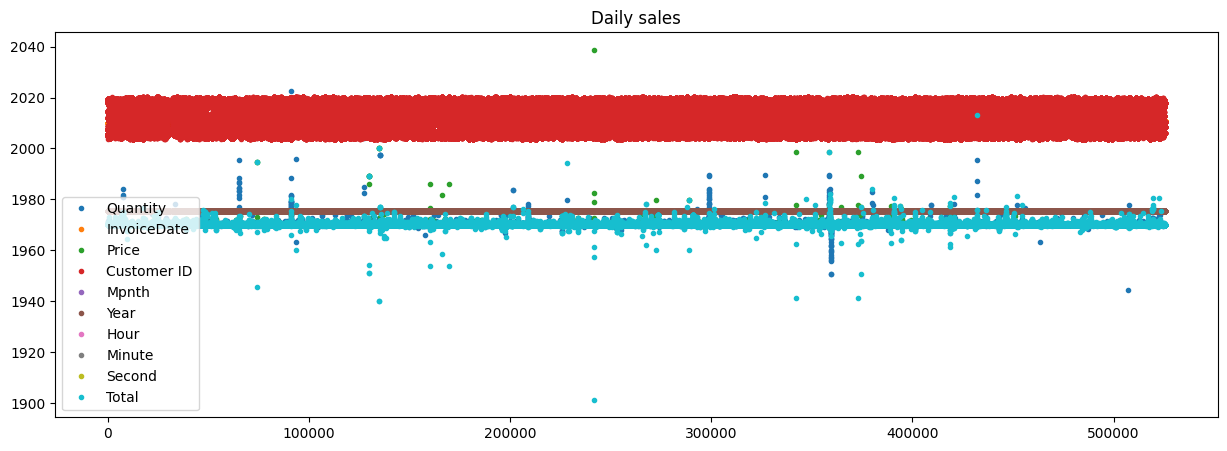

In [110]:
df1.plot(style='.',figsize=(15,5),title="Daily sales")

In [112]:
df1[df1['Country']=='France']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Mpnth,Year,Hour,Minute,Second,Total
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,12,2009,9,28,0,17.40
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.0,France,12,2009,9,28,0,44.55
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.0,France,12,2009,9,28,0,44.55
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.0,France,12,2009,9,28,0,30.60
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.0,France,12,2009,9,28,0,17.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524487,538093,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,12,2010-12-09 14:49:00,0.85,12682.0,France,12,2010,14,49,0,10.20
524488,538093,22948,METAL DECORATION NAUGHTY CHILDREN,24,2010-12-09 14:49:00,0.85,12682.0,France,12,2010,14,49,0,20.40
524489,538093,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-09 14:49:00,0.85,12682.0,France,12,2010,14,49,0,10.20
524490,538093,22082,RIBBON REEL STRIPES DESIGN,10,2010-12-09 14:49:00,1.65,12682.0,France,12,2010,14,49,0,16.50


In [119]:
CountryDf=[]
for i in df1.Country.unique():
    dfname=str(i)+'df'
    dfname=df1[df1['Country']==i]
    CountryDf.append(dfname)

<Axes: xlabel='InvoiceDate'>

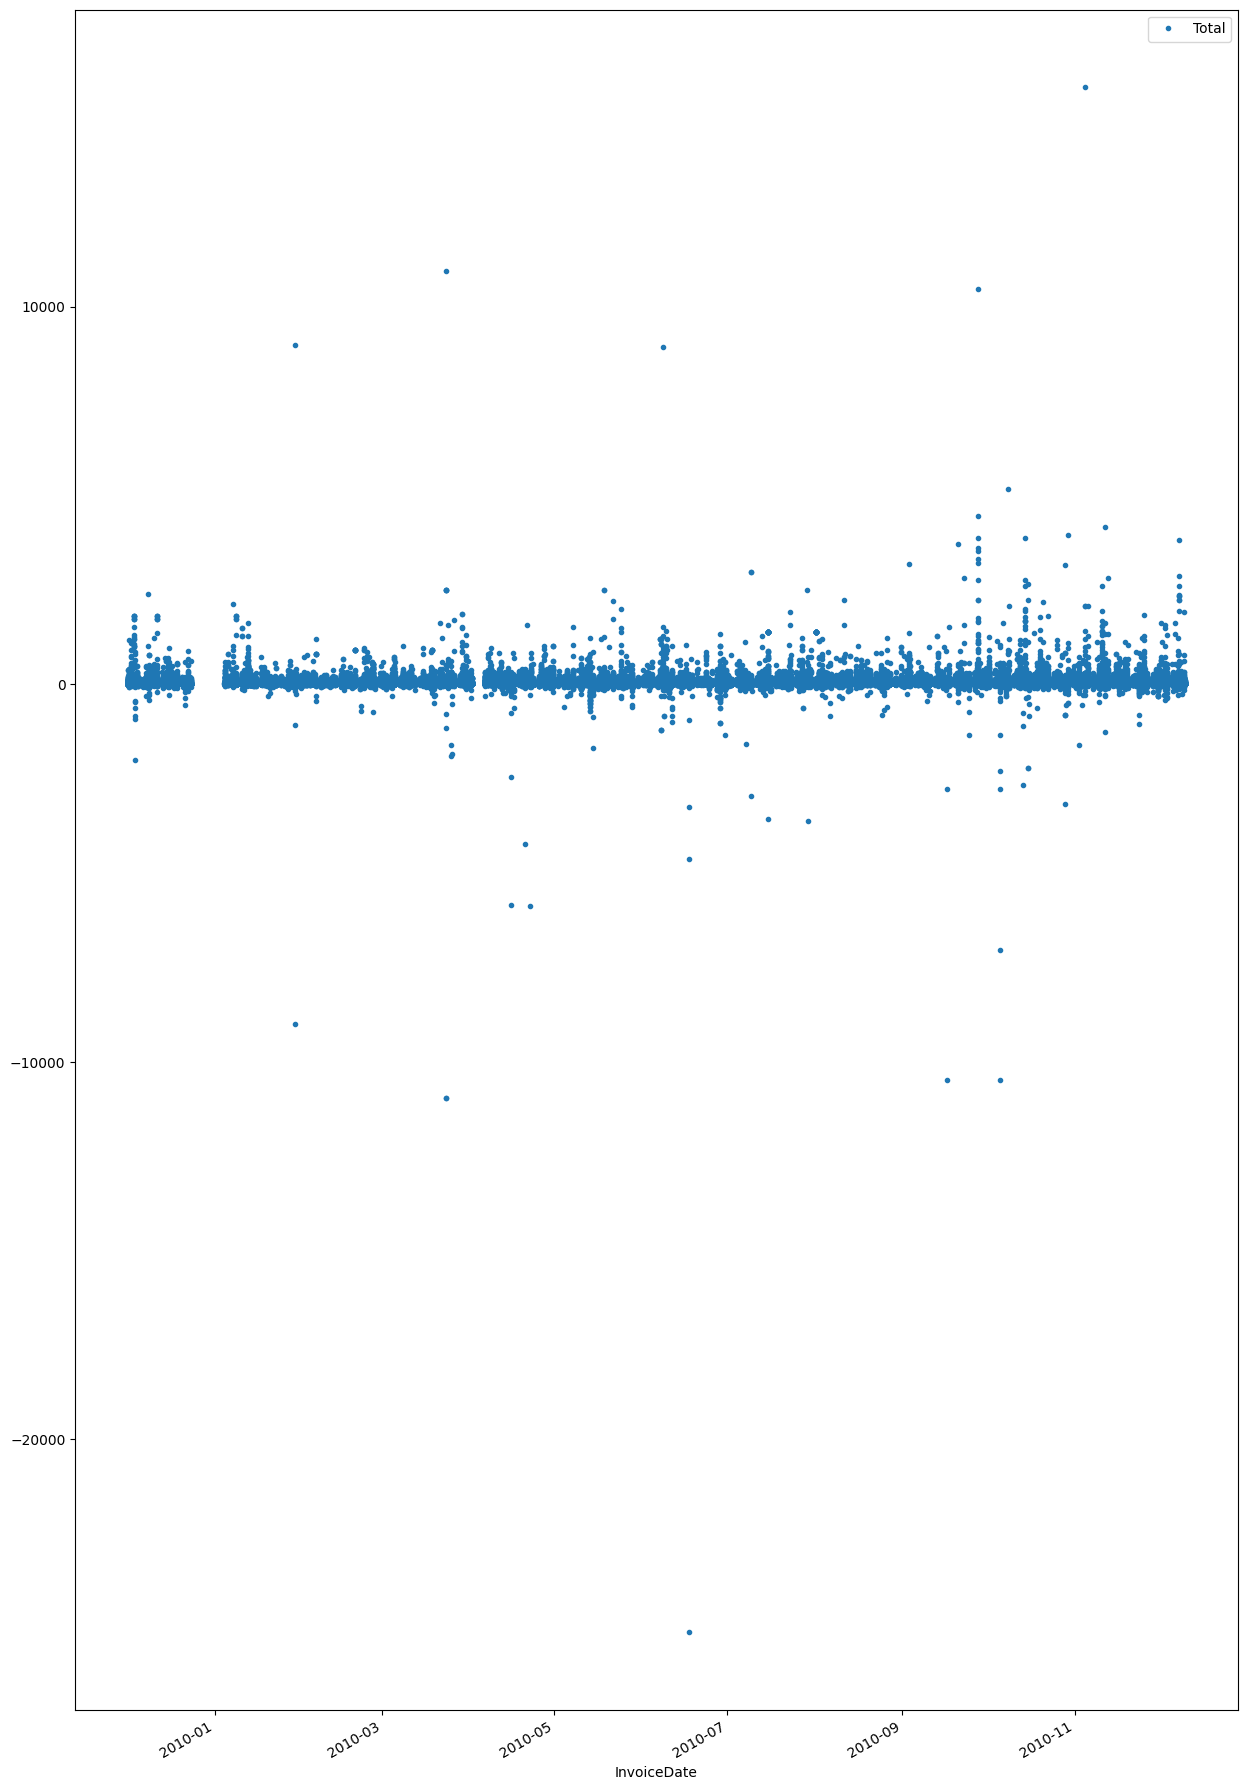

In [145]:

CountryDf[0].plot(x='InvoiceDate',y='Total',figsize=(15,25),style='.')

,Key,Value
0,a,1
1,b,2
2,a,3
3,b,4
4,c,5
